In [82]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from utils import *

%matplotlib inline

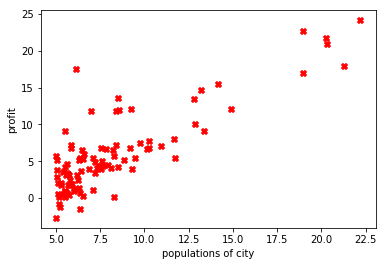

In [201]:
"""
    读取数据，训练集
"""
X_raw,Y= load('ex1data1.h5')
m,n = X_raw.shape
plt.scatter(X_raw,Y,c='r',marker='X')
plt.xlabel('populations of city')
plt.ylabel('profit')
plt.show()

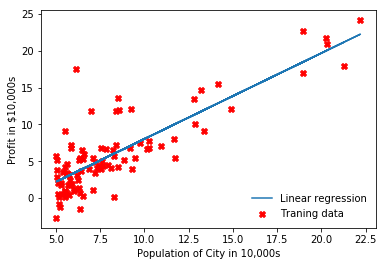

In [206]:
"""
    数据可视化
"""
plt.scatter(X_raw, Y ,c='r',marker='X',label='Traning data')
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.plot(X[:,1], np.dot(X,theta) ,label = 'Linear regression' )
plt.legend(loc='lower right', frameon=False)
plt.show()

In [216]:
"""
    初始化 theta 以及 对X加一列1，因为 theta 中是有一个theta0 ，为了实现向量化运算，在X中加了一列 1 。
"""
def initilization(X):
    m,n = X.shape
    theta = np.ones((n+1,1))
    X = np.column_stack(( np.ones((m,1)) ,X))
    
    return X,theta

In [217]:
def compute_cost(X,Y,theta):
    H_theta = np.dot( X , theta )
    J = np.sum( np.power( H_theta-Y , 2 ) )/(2*m)
    
    return J,H_theta

In [218]:
def gradient_descent(X,Y,H_theta,theta,alpha):
    m = X.shape[0]
    
    Dtheta = np.sum( (H_theta-Y)*X ,axis=0,keepdims=True)/m
    theta = theta - alpha*Dtheta.transpose()
    
    return theta

In [219]:
def model(X,Y,theta,alpha=0.01,iterations=1000):
    
    for i in range(iterations):
        J,H_theta = compute_cost(X,Y,theta)
        theta = gradient_descent(X,Y,H_theta,theta,alpha)
        #print(theta)
        
    return theta

In [220]:
def predict(x,theta):
    return np.dot(x,theta)

In [222]:
X,theta = initilization(X_raw)
J,H_theta = compute_cost(X,Y,theta)
theta = gradient_descent(X,Y,H_theta,theta,alpha=0.01)
print(theta)


[[ 0.96679335]
 [ 0.75765107]]


In [81]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))
print(J_vals.shape)

(100, 100)


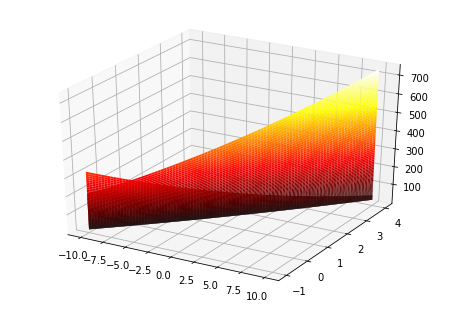

In [234]:
# for i in range(len(theta0_vals)):
#     for j in range(len(theta1_vals)):
#         t =  np.array( [[ theta0_vals[i] ] ,[ theta1_vals[j] ] ] )
#         J_vals[i,j],_ = compute_cost(X, Y, t)
        
#J_vals = J_vals.transpose()

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(theta0_vals ,theta1_vals, J_vals, rstride=1, cstride=1, cmap='hot')
#ax.view_init(elev=20., azim=180)
plt.show()

In [173]:
def feature_normalize(X):
    X_std = np.std(X,axis=0)
    X_mean = np.mean(X,axis=0)
    X_norm = (X-X_mean)/X_std
    
    
    return X_norm

In [191]:
def gradient_descent_multi(X,Y,theta,alpha,num_iters):
    m = X.shape[0]
    J_history = []
    for i in range(num_iters):
        H_theta = np.dot(X,theta)
        J = np.sum( np.power(H_theta-Y,2) )/(2*m)
        theta -= alpha*np.sum( (H_theta-Y)*X , axis = 0 ,keepdims=True).transpose()/m
        J_history.append(J)
    return theta,J_history
    

In [194]:
X,Y = load('ex1data2.h5')
theta = np.zeros((3,1))
alpha = 0.1
num_iters = 400
X_norm = feature_normalize(X)
X_norm = np.column_stack( (np.ones((X_norm.shape[0],1)),X_norm )) 
theta,J_history = gradient_descent_multi(X_norm,Y,theta,alpha,num_iters)


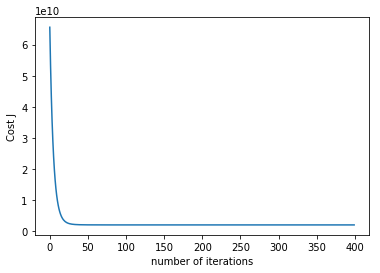

In [195]:
plt.plot(np.arange(num_iters), J_history)
plt.xlabel('number of iterations')
plt.ylabel('Cost J')
plt.show()